<a href="https://colab.research.google.com/github/james-monahan/Code-school-notebooks/blob/main/Hackathon-1/hackathon1_nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install api-offres-emploi

In [ ]:
from offres_emploi import Api
client = Api(client_id=" ", 
             client_secret=" ")

In [ ]:
from offres_emploi.utils import dt_to_str_iso
import datetime
from datetime import timedelta
import time
from offres_emploi.utils import filters_to_df
import pandas as pd

In [ ]:
default = ["Analyst","Data analyst", "Analyste décisionnel", "Analyste de gestion informatique", 
          'Analyste-programmeur / Analyste-programmeuse informatique', 
          'Analyste concepteur / conceptrice informatique', 'Analyste logistique', 'sql', 'python', 'data scientist', 'machine learning']

In [ ]:

def get_jobs(keywords = default, days_since = 90)

vals = ["0-149", "150-299", "300-449", "450-599", "600-749", "750-899", "900-1049"]
frames = []

for title in default:
  for val in vals:
    try:
      start_dt = datetime.datetime.today() - timedelta(days=days_since)
      end_dt = datetime.datetime.today()
      params = {
          "range": val,
          "motsCles": title,
          'minCreationDate': dt_to_str_iso(start_dt),
          'maxCreationDate': dt_to_str_iso(end_dt)
      }

      search_on_big_data = client.search(params=params)
      filters = search_on_big_data['filtresPossibles']
      results =  search_on_big_data['resultats']
      content_range = search_on_big_data['Content-Range']
      df = pd.DataFrame(results)
      frames.append(df)
      time.sleep(3)



    except AttributeError or HTTPError:
      print("Variable x is not defined")
      break
df = pd.concat(frames)

map_cities = {'75': 'Paris', '13':	'Marseille', '69':	'Lyon','31':	'Toulouse', '6':	'Nice',
'44':	'Nantes', '34':	'Montpellier', '67':	'Strasbourg', '33':	'Bordeaux', '59':	'Lille', '35':	'Rennes',
'51':	'Reims', '42':	'Saint-Étienne', '83':	'Toulon', '76':	'Le Havre', '38':	'Grenoble', '21':	'Dijon',
'49':	'Angers', '30':	'Nîmes', '974': 'Saint-Denis', '69':	'Villeurbanne', '63':	'Clermont-Ferrand',
'72':	'Le Mans', '29':	'Brest', '37':	'Tours', '80':	'Amiens', '87':	'Limoges',
'74':	'Annecy', '66':	'Perpignan'
#'13':	'Aix-en-Provence' 
}

results_df = df.copy()
results_df = results_df[['typeContrat', 'appellationlibelle', 'intitule', 'langues', 'lieuTravail', 'natureContrat', 'typeContrat']]
results_df = results_df.fillna(0, axis=0)
results_df['lieuTravail'] = results_df.agg(dict(lieuTravail=lambda x: x.get('libelle')))
#results_df['langues'] = results_df.agg(dict(langues=lambda x: x['libelle']))
#results_df['langues'] = results_df['langues'].apply(lambda x: if x x[0] else None)
results_df['department'] = results_df['lieuTravail'].apply(lambda x: x.split()[0])
#results_df['city'] = results_df['department'].apply(lambda x: x.split(' '))
#results_df['city'] = results_df['city'].explode()
results_df['city_join']= results_df['department'].map(map_cities)

Making request with params {'range': '0-149', 'motsCles': 'Analyst', 'minCreationDate': '2020-08-21T20:31:23Z', 'maxCreationDate': '2020-11-19T20:31:23Z'}
Making request with params {'range': '150-299', 'motsCles': 'Analyst', 'minCreationDate': '2020-08-21T20:31:30Z', 'maxCreationDate': '2020-11-19T20:31:30Z'}
Variable x is not defined
Making request with params {'range': '0-149', 'motsCles': 'Data analyst', 'minCreationDate': '2020-08-21T20:31:30Z', 'maxCreationDate': '2020-11-19T20:31:30Z'}
Making request with params {'range': '150-299', 'motsCles': 'Data analyst', 'minCreationDate': '2020-08-21T20:31:34Z', 'maxCreationDate': '2020-11-19T20:31:34Z'}
Variable x is not defined
Making request with params {'range': '0-149', 'motsCles': 'Analyste décisionnel', 'minCreationDate': '2020-08-21T20:31:34Z', 'maxCreationDate': '2020-11-19T20:31:34Z'}
Making request with params {'range': '150-299', 'motsCles': 'Analyste décisionnel', 'minCreationDate': '2020-08-21T20:31:39Z', 'maxCreationDate': 

In [ ]:
df = pd.concat(frames)
df.head()


,alternance,appellationlibelle,competences,dateActualisation,dateCreation,description,dureeTravailLibelleConverti,entreprise,experienceExige,experienceLibelle,formations,id,intitule,langues,lieuTravail,natureContrat,nombrePostes,origineOffre,qualificationCode,romeCode,romeLibelle,salaire,typeContrat,typeContratLibelle,accessibleTH,contact,dureeTravailLibelle,qualificationLibelle,secteurActivite,secteurActiviteLibelle,trancheEffectifEtab,qualitesProfessionnelles,conditionExercice,experienceCommentaire,permis,deplacementCode,deplacementLibelle,agence,complementExercice
0,False,Analyste décisionnel - Business Intelligence,[],2020-11-19T15:24:47+01:00,2020-11-19T15:24:47+01:00,"AMD consulting, est un acteur reconnu dans le ...",Non renseigné,{'nom': 'AMD Consulting'},E,Expérience exigée de 1 An(s),[],7581376,Business analyst Fircosoft H/F,[],"{'codePostal': '75001', 'commune': '75101', 'l...",Contrat travail,1,"{'origine': '2', 'partenaires': [{'logo': 'htt...",X,M1805,Études et développement informatique,"{'libelle': 'Annuel de 45000,00 Euros ï¿¿ 5500...",CDI,Contrat à durée indéterminée,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,Chef de projet informatique,[],2020-11-19T15:24:46+01:00,2020-11-19T15:24:41+01:00,Chef de Projet MOA / Business Analyst Senior S...,Non renseigné,{'nom': 'Mason Frank'},E,Expérience exigée de 1 An(s),[],7581353,Chef de Projet / Business Analyst Senior Sales...,[],"{'codePostal': '69001', 'commune': '69381', 'l...",Contrat travail,1,"{'origine': '2', 'partenaires': [{'logo': 'htt...",X,M1803,Direction des systèmes d'information,"{'libelle': 'Annuel de 30000,00 Euros ï¿¿ 6000...",CDI,Contrat à durée indéterminée,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,Analyste décisionnel - Business Intelligence,[],2020-11-19T14:57:49+01:00,2020-11-19T14:57:48+01:00,"Sopra Steria, fort de près de 44 000 collabora...",Non renseigné,{'nom': 'SOPRA STERIA'},E,Expérience exigée de 5 An(s),"[{'codeFormation': '34554', 'commentaire': 'Pa...",7580952,Business Analyst - ERP - Immobilier - Lyon H/F,[],"{'codePostal': '69001', 'commune': '69381', 'l...",Contrat travail,1,"{'origine': '2', 'partenaires': [{'logo': 'htt...",X,M1805,Études et développement informatique,NaN,CDI,Contrat à durée indéterminée,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,Data analyst,"[{'code': '109527', 'exigence': 'S', 'libelle'...",2020-11-19T00:00:00+01:00,2020-11-19T10:06:15+01:00,Nous recrutons pour notre client basé sur Anne...,Temps plein,{'nom': 'ATOLL GROUPE-FORMAT-RECRUT-DEVELOP ARC'},E,3 ans,[],107PTMH,Data analyst (H/F),[],"{'codePostal': '74000', 'commune': '74010', 'l...",Contrat travail,1,"{'origine': '1', 'partenaires': [], 'urlOrigin...",6,M1403,Études et prospectives socio-économiques,"{'libelle': 'Annuel de 30000,00 Euros à 40000,...",CDI,Contrat à durée indéterminée,False,{'coordonnees1': 'Courriel : lilia.chebbi@alpe...,35H Horaires normaux,Employé qualifié,64,Activités des sociétés holding,0 salarié,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,Analyst revenue management,[],2020-11-19T03:46:20+01:00,2020-11-19T03:46:20+01:00,&lt;p&gt;On a besoin de toi pour accompagner n...,Non renseigné,NaN,E,Expérience exigée,[],7550877,Analyst revenue management h/f,[],{'libelle': '92 - Hauts de Seine'},Contrat travail,1,"{'origine': '2', 'partenaires': [{'logo': 'htt...",X,G1302,Optimisation de produits touristiques,NaN,CDI,Contrat à durée indéterminée,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
map_cities = {'75': 'Paris', '13':	'Marseille', '69':	'Lyon','31':	'Toulouse', '6':	'Nice',
'44':	'Nantes', '34':	'Montpellier', '67':	'Strasbourg', '33':	'Bordeaux', '59':	'Lille', '35':	'Rennes',
'51':	'Reims', '42':	'Saint-Étienne', '83':	'Toulon', '76':	'Le Havre', '38':	'Grenoble', '21':	'Dijon',
'49':	'Angers', '30':	'Nîmes', '974': 'Saint-Denis', '69':	'Villeurbanne', '63':	'Clermont-Ferrand',
'72':	'Le Mans', '29':	'Brest', '37':	'Tours', '80':	'Amiens', '87':	'Limoges',
'74':	'Annecy', '66':	'Perpignan'
#'13':	'Aix-en-Provence' 
}

In [ ]:
results_df = df.copy()
results_df = results_df[['typeContrat', 'appellationlibelle', 'intitule', 'langues', 'lieuTravail', 'natureContrat', 'typeContrat']]
results_df = results_df.fillna(0, axis=0)
results_df['lieuTravail'] = results_df.agg(dict(lieuTravail=lambda x: x.get('libelle')))
#results_df['langues'] = results_df.agg(dict(langues=lambda x: x['libelle']))
#results_df['langues'] = results_df['langues'].apply(lambda x: if x x[0] else None)
results_df['department'] = results_df['lieuTravail'].apply(lambda x: x.split()[0])
#results_df['city'] = results_df['department'].apply(lambda x: x.split(' '))
#results_df['city'] = results_df['city'].explode()
results_df['city_join']= results_df['department'].map(map_cities)

In [ ]:
results_df['city_join'].value_counts()

Paris               270
Aix-en-Provence     131
Villeurbanne        125
Lille                96
Nantes               70
Toulouse             62
Bordeaux             55
Montpellier          45
Strasbourg           36
Grenoble             30
Rennes               25
Annecy               24
Toulon               23
Limoges              15
Tours                15
Nîmes                15
Clermont-Ferrand     14
Reims                14
Dijon                12
Angers               10
Saint-Denis           9
Le Havre              9
Le Mans               8
Saint-Étienne         7
Brest                 7
Perpignan             5
Name: city_join, dtype: int64

##Second data set

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

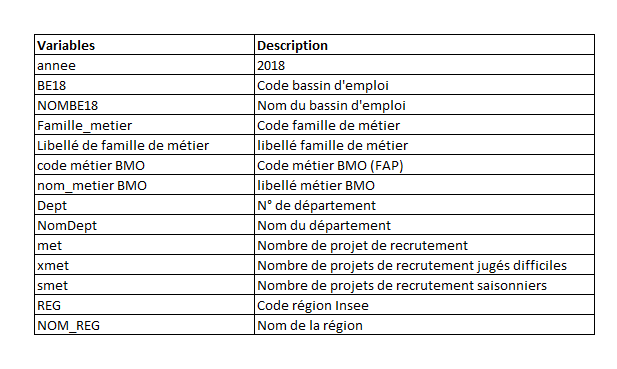

In [ ]:
id = '1nU8eDONGcEv8-SVzTtP2Ur0lnMvcFgRe'
downloaded = drive.CreateFile({'id': '1nU8eDONGcEv8-SVzTtP2Ur0lnMvcFgRe'})
downloaded.GetContentFile('ResMetBE20.xlsx')

df_2020 = pd.read_excel('ResMetBE20.xlsx', sheet_name=1) 

df_2020['Dept'] = df_2020['Dept'].str.replace('06', '6')

In [ ]:
id = '1IeupK9-F6jaKieC6d-jkTs2evdJKIx0A'
downloaded = drive.CreateFile({'id': '1IeupK9-F6jaKieC6d-jkTs2evdJKIx0A'})
downloaded.GetContentFile('ResMetBE19.xlsx')

df_2019 = pd.read_excel('ResMetBE19.xlsx', sheet_name=1) 

df_2019['Dept'] = df_2019['Dept'].str.replace('06', '6')

In [ ]:
id = '1hyIzvvrKDZcvskiGIDlSkUUCNpf4RpJ2'
downloaded = drive.CreateFile({'id': '1hyIzvvrKDZcvskiGIDlSkUUCNpf4RpJ2'})
downloaded.GetContentFile('ResMetBE18.xlsx')

df_2018 = pd.read_excel('ResMetBE18.xlsx', sheet_name=1) 
df_2018['Dept'] = df_2018['Dept'].astype('string')

In [ ]:
df_Pole = pd.concat([df_2020, df_2019, df_2018])

In [ ]:
df_Pole = df_Pole.dropna(axis=1)

In [ ]:
df_Pole = df_Pole[df_Pole['Dept'].apply(lambda x: x in map_cities.keys())]

In [ ]:
df_Pole['city_join']= df_Pole['Dept'].map(map_cities)

In [ ]:
df_Pole = df_Pole[df_Pole['nommetier'].apply(lambda x: 'informatique' in x)]

In [ ]:
df_Pole['nommetier'].unique()

array(['Employés et opérateurs en informatique',
       "Techniciens d'étude et de développement en informatique",
       "Techniciens de production, d'exploitation, d'installation, et de maintenance, support et services aux utilisateurs en informatique",
       "Ingénieurs et cadres d'étude, recherche et développement en informatique, chefs de projets informatiques",
       "Ingénieurs et cadres d'administration, maintenance en informatique",
       "Employés et opérateurs de l'informatique",
       "Techniciens d'études et de développ. en informatique (y compris webmasters, programmeurs…)",
       "Ingénieurs et cadres d'études, R et D en informatique, chefs de projets informatiques"],
      dtype=object)

In [ ]:
df_Pole['met'] = round(pd.to_numeric(df_Pole['met'], errors='coerce', downcast='integer').fillna(0))

In [ ]:
df_Pole.head()

,annee,Famille_met,Lbl_fam_met,metier,nommetier,Dept,met,xmet,smet,city_join
27381,2020,A,Fonctions administratives,M0Z60,Employés et opérateurs en informatique,974,0.0,*,*,Saint-Denis
27382,2020,A,Fonctions administratives,M0Z60,Employés et opérateurs en informatique,974,12.0,7,*,Saint-Denis
27383,2020,A,Fonctions administratives,M0Z60,Employés et opérateurs en informatique,974,0.0,*,*,Saint-Denis
27384,2020,A,Fonctions administratives,M0Z60,Employés et opérateurs en informatique,974,14.0,*,*,Saint-Denis
27387,2020,A,Fonctions administratives,M0Z60,Employés et opérateurs en informatique,75,2026.0,544,21,Paris


In [ ]:
df_flat = df_Pole.groupby(['annee', 'Dept'])['met'].sum().unstack().diff()
df_flat

Dept,13,21,29,30,31,33,34,35,37,38,42,44,49,51,59,6,63,66,67,69,72,74,75,76,80,83,87,974
annee,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,451.0,49.0,417.0,70.0,914.0,316.0,330.0,321.0,-65.0,690.0,1.0,1844.0,214.0,42.0,1180.0,431.0,-21.0,10.0,736.0,723.0,11.0,-69.0,5435.0,188.0,265.0,47.0,42.0,185.0
2020,656.0,69.0,-148.0,123.0,597.0,913.0,229.0,283.0,70.0,-83.0,161.0,379.0,13.0,15.0,312.0,263.0,119.0,-21.0,-429.0,310.0,9.0,135.0,-935.0,110.0,13.0,243.0,67.0,56.0


In [ ]:
df_roc = df_Pole.groupby(['annee', 'Dept'])['met'].sum().unstack().pct_change()
df_roc = df_flat[df_flat.index == 2020].stack().to_frame()
df_roc = df_roc.reset_index().drop('annee', axis=1).rename(columns={"Dept": "Dept", 0: "ROC_Proj_Recruit"})
df_roc.head()


,Dept,ROC_Proj_Recruit
0,13,0.264943
1,21,0.372973
2,29,-0.216374
3,30,0.549107
4,31,0.136053


In [ ]:
df_sum = df_Pole.groupby(['annee', 'Dept'])['met'].sum().unstack()
df_sum = df_sum[df_flat.index == 2020].stack().to_frame()
df_sum = df_sum.reset_index().drop('annee', axis=1).rename(columns={"Dept": "Dept", 0: "SUM_Proj_Recruit"})
df_sum.head()
                                                           

,Dept,SUM_Proj_Recruit
0,13,3132.0
1,21,254.0
2,29,536.0
3,30,347.0
4,31,4985.0


In [ ]:
df_pole_vals = pd.merge(df_roc, df_sum, on='Dept')
df_pole_vals 

,Dept,ROC_Proj_Recruit,SUM_Proj_Recruit
0,13,0.264943,3132.0
1,21,0.372973,254.0
2,29,-0.216374,536.0
3,30,0.549107,347.0
4,31,0.136053,4985.0
5,33,0.577848,2493.0
6,34,0.185726,1462.0
7,35,0.165207,1996.0
8,37,0.182768,453.0
9,38,-0.046866,1688.0


In [ ]:
df_flat = df_Pole.groupby(['annee', 'Dept'])['met'].sum().unstack().pct_change()
df_flat

Dept,13,21,29,30,31,33,34,35,37,38,42,44,49,51,59,6,63,66,67,69,72,74,75,76,80,83,87,974
annee,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,0.222716,0.360294,1.561798,0.454545,0.263097,0.250000,0.365449,0.230603,-0.145089,0.638298,0.004902,0.890821,0.963964,0.278146,0.333522,0.276814,-0.039179,0.080645,0.795676,0.173257,0.108911,-0.204142,0.437319,0.776860,2.453704,0.172161,0.933333,2.176471
2020,0.264943,0.372973,-0.216374,0.549107,0.136053,0.577848,0.185726,0.165207,0.182768,-0.046866,0.785366,0.096832,0.029817,0.077720,0.066130,0.132294,0.231068,-0.156716,-0.258278,0.063317,0.080357,0.501859,-0.052343,0.255814,0.034853,0.759375,0.770115,0.207407


In [ ]:
df_flat = df_Pole.groupby(['annee', 'Dept'])['met'].sum().unstack()
df_flat

Dept,13,21,29,30,31,33,34,35,37,38,42,44,49,51,59,6,63,66,67,69,72,74,75,76,80,83,87,974
annee,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018,2025.0,136.0,267.0,154.0,3474.0,1264.0,903.0,1392.0,448.0,1081.0,204.0,2070.0,222.0,151.0,3538.0,1557.0,536.0,124.0,925.0,4173.0,101.0,338.0,12428.0,242.0,108.0,273.0,45.0,85.0
2019,2476.0,185.0,684.0,224.0,4388.0,1580.0,1233.0,1713.0,383.0,1771.0,205.0,3914.0,436.0,193.0,4718.0,1988.0,515.0,134.0,1661.0,4896.0,112.0,269.0,17863.0,430.0,373.0,320.0,87.0,270.0
2020,3132.0,254.0,536.0,347.0,4985.0,2493.0,1462.0,1996.0,453.0,1688.0,366.0,4293.0,449.0,208.0,5030.0,2251.0,634.0,113.0,1232.0,5206.0,121.0,404.0,16928.0,540.0,386.0,563.0,154.0,326.0


In [ ]:
df_roc.unstack()

Dept,13,21,29,30,31,33,34,35,37,38,42,44,49,51,59,6,63,66,67,69,72,74,75,76,80,83,87,974
annee,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018,NaN,-1889.0,131.0,-113.0,3320.0,-2210.0,-361.0,489.0,-944.0,633.0,-877.0,1866.0,-1848.0,-71.0,3387.0,-1981.0,-1021.0,-412.0,801.0,3248.0,-4072.0,237.0,12090.0,-12186.0,-134.0,165.0,-228.0,40.0
2019,2391.0,-2291.0,499.0,-460.0,4164.0,-2808.0,-347.0,480.0,-1330.0,1388.0,-1566.0,3709.0,-3478.0,-243.0,4525.0,-2730.0,-1473.0,-381.0,1527.0,3235.0,-4784.0,157.0,17594.0,-17433.0,-57.0,-53.0,-233.0,183.0
2020,2862.0,-2878.0,282.0,-189.0,4638.0,-2492.0,-1031.0,534.0,-1543.0,1235.0,-1322.0,3927.0,-3844.0,-241.0,4822.0,-2779.0,-1617.0,-521.0,1119.0,3974.0,-5085.0,283.0,16524.0,-16388.0,-154.0,177.0,-409.0,172.0


In [ ]:
df_Pole.groupby('Dept')['met'].diff()

27381    -67.0
27381      NaN
27382    229.0
27382     12.0
27383    -44.0
         ...  
44315     13.0
44316    -13.0
44321      0.0
44322     15.0
44323     -4.0
Name: met, Length: 1125, dtype: float64

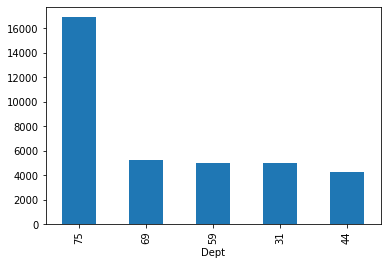

In [ ]:
df_Pole[df_Pole['annee']==2020].groupby(['Dept'])['met'].sum().nlargest(5).plot(kind='bar')

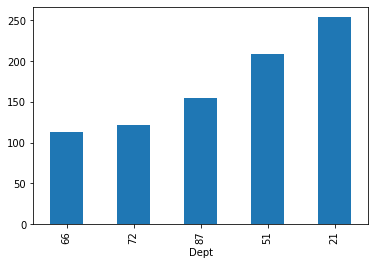

In [ ]:
df_Pole[df_Pole['annee']==2020].groupby(['Dept'])['met'].sum().sort_values()[0:5].plot(kind='bar')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_Pole.groupby(['annee', 'Dept'])['met'].sum().nlargest(5)

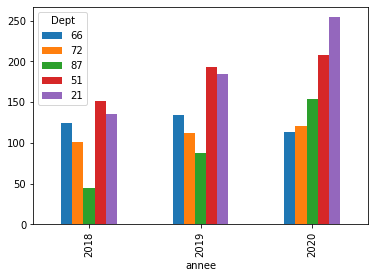

In [ ]:
sm_cols = ['66', '72', '87', '51', '21']
cols = ['75', '69', '59', '31', '44']
df_flat[sm_cols].plot(kind='bar')
plt.show()